# Visualize Food Ingredients (Sweetness vs Crunchiness)

Scatter plot of ingredients colored by food type. Tomato (test) is highlighted.

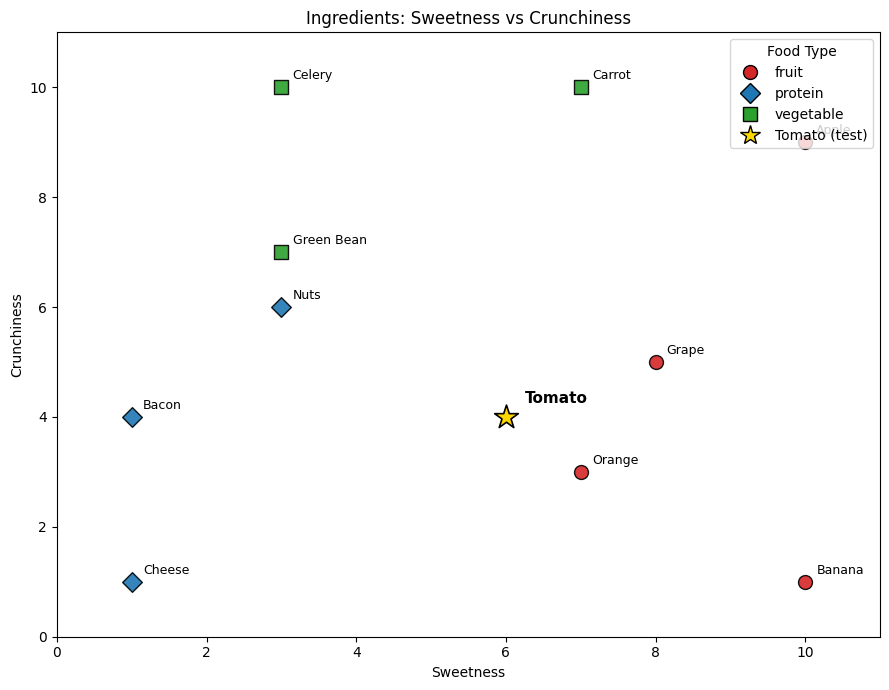

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

# Data
sweet_crunchy = [[10,9], [1,4], [10,1], [7,10], [3,10],
                 [1,1], [8,5], [3,7], [3,6], [7,3]]

ingredients = ["Apple", "Bacon", "Banana", "Carrot", "Celery",
               "Cheese", "Grape", "Green Bean", "Nuts", "Orange"]

FoodType = ["fruit", "protein", "fruit", "vegetable", "vegetable",
            "protein", "fruit", "vegetable", "protein", "fruit"]

test = [6, 4]  # Tomato coordinates

df = pd.DataFrame(sweet_crunchy, columns=['Sweetness','Crunchiness'])
df['Ingredient'] = ingredients
df['Type'] = FoodType

# Visual mapping
type_colors = {'fruit':'tab:red', 'vegetable':'tab:green', 'protein':'tab:blue'}
type_markers = {'fruit':'o', 'vegetable':'s', 'protein':'D'}

fig, ax = plt.subplots(figsize=(9,7))

for t in sorted(df['Type'].unique()):
    sub = df[df['Type']==t]
    ax.scatter(sub['Sweetness'], sub['Crunchiness'],
               c=type_colors.get(t,'gray'), marker=type_markers.get(t,'o'),
               s=100, label=t, edgecolor='k', alpha=0.9)
    for _, row in sub.iterrows():
        ax.text(row['Sweetness']+0.15, row['Crunchiness']+0.15, row['Ingredient'], fontsize=9)

# Highlight test item (Tomato) with a prominent star marker
ax.scatter(test[0], test[1], marker='*', s=320, c='gold', edgecolor='black', linewidths=1.2, zorder=5)
ax.text(test[0]+0.25, test[1]+0.25, 'Tomato', fontsize=11, weight='bold')

# Custom legend to show marker shapes and Tomato
legend_elements = [Line2D([0], [0], marker=type_markers[k], color='w', label=k,
                          markerfacecolor=type_colors[k], markeredgecolor='k', markersize=10) for k in sorted(type_colors.keys())]
legend_elements.append(Line2D([0], [0], marker='*', color='w', label='Tomato (test)',
                              markerfacecolor='gold', markeredgecolor='black', markersize=15))
ax.legend(handles=legend_elements, title='Food Type', loc='upper right')

ax.set_xlabel('Sweetness')
ax.set_ylabel('Crunchiness')
ax.set_title('Ingredients: Sweetness vs Crunchiness')
ax.set_xlim(0, 11)
ax.set_ylim(0, 11)
plt.tight_layout()
plt.show()